In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

C:\Users\Diya\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("C:/Users/Diya/OneDrive/Desktop/Mini Project/Datasets/fake_transactional_data_24.csv")

In [3]:
df.head(6)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
5,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025


In [4]:
# Filter to include only business transactions
is_business_transaction = df['to_randomly_generated_account'].apply(lambda x: not x.isnumeric())
business_transactions = df[is_business_transaction]

# Create a new DataFrame
biz_df = business_transactions[['to_randomly_generated_account', 'monopoly_money_amount', 'not_happened_yet_date']]
biz_df.columns = ['Business_Name', 'Amount_Received', 'Date']

In [5]:
biz_df.head(50)

,Business_Name,Amount_Received,Date
0,CINEMA,4.00,01/01/2025
3,HIPSTER_COFFEE_SHOP,4.10,01/01/2025
5,TOTALLY_A_REAL_COFFEE_SHOP,4.45,01/01/2025
6,COFFEE_SHOP,1.45,01/01/2025
7,CAFE,5.00,01/01/2025
8,COFFEE_SHOP,2.55,01/01/2025
9,COFFEE_SHOP,1.80,01/01/2025
10,A_CAFE,2.55,01/01/2025
11,TOTALLY_A_REAL_COFFEE_SHOP,2.65,01/01/2025
12,LOCAL_RESTAURANT,4.50,01/01/2025


In [6]:
# Assuming df is your DataFrame
biz_df.to_csv('C:/Users/Diya/OneDrive/Desktop/Mini Project/biz-df.csv', index=False)


In [ ]:
biz_df = pd.read_csv("C:/Users/Diya/OneDrive/Desktop/Mini Project/Datasets/biz-df.csv")

In [7]:
# Extract all unique business names from the 'Business_Name' column
unique_business_names = biz_df['Business_Name'].unique()

# Print the unique business names
print(unique_business_names)

['CINEMA' 'HIPSTER_COFFEE_SHOP' 'TOTALLY_A_REAL_COFFEE_SHOP' 'COFFEE_SHOP'
 'CAFE' 'A_CAFE' 'LOCAL_RESTAURANT' 'A_LOCAL_COFFEE_SHOP'
 'GOURMET_COFFEE_SHOP' 'LOCAL_WATERING_HOLE' 'SANDWICH_SHOP' 'TOY_SHOP'
 'PRETENTIOUS_COFFEE_SHOP' 'BAR' 'PUB' 'COMIC_BOOK_SHOP' 'LUNCH_VAN'
 'DEPARTMENT_STORE' 'KEBAB_SHOP' 'WINE_BAR' 'ELECTRONICS_SHOP'
 'RESTAURANT' 'LOCAL_PUB' 'LUNCH_PLACE' 'FASHION_SHOP'
 'FASHIONABLE_SPORTSWARE_SHOP' 'SCHOOL_SUPPLY_STORE' 'LOCAL_BOOKSHOP'
 'TRAINER_SHOP' 'BOOKSHOP' 'KIDS_ACTIVITY_CENTRE' 'VIDEO_GAME_STORE'
 'CLOTHES_SHOP' 'TAKEAWAY_CURRY' 'TECH_SHOP' 'NERDY_BOOK_STORE'
 'WHISKEY_BAR' 'PET_TOY_SHOP' 'DVD_SHOP' 'CHILDRENDS_SHOP' 'GAME_SHOP'
 'INDIAN_RESTAURANT' 'COCKTAIL_BAR' 'RUNNING_SHOP' 'DIY_STORE' 'COOKSHOP'
 'HOME_IMPROVEMENT_STORE' 'PET_SHOP' 'CHINESE_TAKEAWAY' 'BUTCHERS'
 'SECOND_HAND_BOOKSHOP' 'G&T_BAR' 'GREENGROCER' 'JEWLLERY_SHOP'
 'ACCESSORY_SHOP' 'TAKEAWAY' 'KIDS_CLOTHING_SHOP' 'SPORT_SHOP'
 'STEAK_HOUSE' 'HIPSTER_ELECTRONICS_SHOP' 'CHINESE_RESTAURANT'
 'S

In [8]:
# Create a dictionary to hold dataframes for each business
individual_business_dfs = {}

for business in biz_df['Business_Name'].unique():
    # Filter the dataframe for each business
    business_specific_df = biz_df[biz_df['Business_Name'] == business].reset_index(drop=True)
    # Add the filtered dataframe to the dictionary with the business name as the key
    individual_business_dfs[business] = business_specific_df


In [9]:
# Accessing a specific business's dataframe from the dictionary
# For example, to access the dataframe for 'CINEMA'
cinema_df = individual_business_dfs['CINEMA']

# Print the dataframe for demonstration
print(cinema_df.head())

  Business_Name  Amount_Received        Date
0        CINEMA              4.0  01/01/2025
1        CINEMA              4.0  01/01/2025
2        CINEMA              5.0  01/01/2025
3        CINEMA              6.0  01/01/2025
4        CINEMA              4.0  01/01/2025


In [10]:
hipster_coffee_shop_df = individual_business_dfs['HIPSTER_COFFEE_SHOP']
totally_a_real_coffee_shop_df = individual_business_dfs['TOTALLY_A_REAL_COFFEE_SHOP']
coffee_shop_df = individual_business_dfs['COFFEE_SHOP']
cafe_df = individual_business_dfs['CAFE']
a_cafe_df = individual_business_dfs['A_CAFE']

local_restaurant_df = individual_business_dfs['LOCAL_RESTAURANT']
a_local_coffee_shop_df = individual_business_dfs['A_LOCAL_COFFEE_SHOP']
gourmet_coffee_shop_df = individual_business_dfs['GOURMET_COFFEE_SHOP']
local_watering_hole_df = individual_business_dfs['LOCAL_WATERING_HOLE']
sandwich_shop_df = individual_business_dfs['SANDWICH_SHOP']

toy_shop_df = individual_business_dfs['TOY_SHOP']
pretentious_coffee_shop_df = individual_business_dfs['PRETENTIOUS_COFFEE_SHOP']
bar_df = individual_business_dfs['BAR']
pub_df = individual_business_dfs['PUB']
comic_book_shop_df = individual_business_dfs['COMIC_BOOK_SHOP']

lunch_van_df = individual_business_dfs['LUNCH_VAN']
department_store_df = individual_business_dfs['DEPARTMENT_STORE']
kebab_shop_df = individual_business_dfs['KEBAB_SHOP']
wine_bar_df = individual_business_dfs['WINE_BAR']
electronics_shop_df = individual_business_dfs['ELECTRONICS_SHOP']

restaurant_df = individual_business_dfs['RESTAURANT']
local_pub_df = individual_business_dfs['LOCAL_PUB']
lunch_place_df = individual_business_dfs['LUNCH_PLACE']
fashion_shop_df = individual_business_dfs['FASHION_SHOP']
fashionable_sportware_shop_df = individual_business_dfs['FASHIONABLE_SPORTSWARE_SHOP']

school_supply_store_df = individual_business_dfs['SCHOOL_SUPPLY_STORE']
local_bookshop_df = individual_business_dfs['LOCAL_BOOKSHOP']
trainer_shop_df = individual_business_dfs['TRAINER_SHOP']
bookshop_df = individual_business_dfs['BOOKSHOP']
kids_activity_centre_df = individual_business_dfs['KIDS_ACTIVITY_CENTRE']

video_game_store_df = individual_business_dfs['VIDEO_GAME_STORE']
takeaway_curry_df = individual_business_dfs['TAKEAWAY_CURRY']
tech_shop_df = individual_business_dfs['TECH_SHOP']
nerdy_book_store_df = individual_business_dfs['NERDY_BOOK_STORE']
whiskey_bar_df = individual_business_dfs['WHISKEY_BAR']


In [11]:
pet_toy_shop_df = individual_business_dfs['PET_TOY_SHOP']
dvd_shop_df = individual_business_dfs['DVD_SHOP']
childrends_shop_df = individual_business_dfs['CHILDRENDS_SHOP']
game_shop_df = individual_business_dfs['GAME_SHOP']
indian_restaurant_df = individual_business_dfs['INDIAN_RESTAURANT']

cocktail_bar_df = individual_business_dfs['COCKTAIL_BAR']
running_shop_df = individual_business_dfs['RUNNING_SHOP']
diy_store_df = individual_business_dfs['DIY_STORE']
cookshop_df = individual_business_dfs['COOKSHOP']
home_improvement_store_df = individual_business_dfs['HOME_IMPROVEMENT_STORE']

pet_shop_df = individual_business_dfs['PET_SHOP']
chinese_takeaway_df = individual_business_dfs['CHINESE_TAKEAWAY']
butchers_df = individual_business_dfs['BUTCHERS']
second_hand_bookshop_df = individual_business_dfs['SECOND_HAND_BOOKSHOP']
gt_bar_df = individual_business_dfs['G&T_BAR']

greengrocer_df = individual_business_dfs['GREENGROCER']
jewellery_shop_df = individual_business_dfs['JEWLLERY_SHOP']
accessory_shop_df = individual_business_dfs['ACCESSORY_SHOP']
takeaway_df = individual_business_dfs['TAKEAWAY']
kida_clothing_shop_df = individual_business_dfs['KIDS_CLOTHING_SHOP']


sport_shop_df = individual_business_dfs['SPORT_SHOP']
steak_house_df = individual_business_dfs['STEAK_HOUSE']
hipster_electronics_shop_df = individual_business_dfs['HIPSTER_ELECTRONICS_SHOP']
chinese_restaurant_df = individual_business_dfs['CHINESE_RESTAURANT']
seafood_restaurant_df = individual_business_dfs['SEAFOOD_RESAURANT']

streaming_service_df = individual_business_dfs['STREAMING_SERVICE']
gym_df = individual_business_dfs['GYM']
whiskey_shop_df = individual_business_dfs['WHISKEY_SHOP']
tea_shop_df = individual_business_dfs['TEA_SHOP']
reastaurant_voucher_df = individual_business_dfs['RESTAURANT_VOUCHER']

roasterie_df = individual_business_dfs['ROASTERIE']
liquor_store_df = individual_business_dfs['LIQUOR_STORE']
to_bean_or_not_to_bean_df = individual_business_dfs['TO_BEAN_OR_NOT_TO_BEAN']
wine_cellar_df = individual_business_dfs['WINE_CELLAR']
we_have_bean_weighting_df = individual_business_dfs['WE_HAVE_BEAN_WEIGHTING']

large_supermarket_df = individual_business_dfs['LARGE_SUPERMARKET']
express_supermarket_df = individual_business_dfs['EXPRESS_SUPERMARKET']
butcher_df = individual_business_dfs['BUTCHER']
a_supermarket_df = individual_business_dfs['A_SUPERMARKET']
the_supermarket_df = individual_business_dfs['THE_SUPERMARKET']

florist_df = individual_business_dfs['FLORIST']
turkey_farm_df = individual_business_dfs['TURKEY_FARM']

In [12]:
print(childrends_shop_df.head())

     Business_Name  Amount_Received        Date
0  CHILDRENDS_SHOP             12.0  01/01/2025
1  CHILDRENDS_SHOP             70.0  01/01/2025
2  CHILDRENDS_SHOP             46.0  01/01/2025
3  CHILDRENDS_SHOP             40.0  01/01/2025
4  CHILDRENDS_SHOP             25.0  01/01/2025


In [16]:
# Apply Isolation Forest to detect outliers in 'Amount_Received'
iso_forest = IsolationForest(n_estimators=100, contamination= 0.50, random_state=42)
cinema_df['scores'] = iso_forest.fit_predict(cinema_df[['Amount_Received']])

# Determine if a transaction is an outlier (True for outliers, False for normal)
cinema_df['is_outlier'] = cinema_df['scores'] == -1

# Filter for normal transactions
normal_transactions = cinema_df[cinema_df['is_outlier'] == False]

C:\Users\Diya\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
cinema_df.head()

,Business_Name,Amount_Received,Date,scores,is_outlier
0,CINEMA,4.0,01/01/2025,-1,True
1,CINEMA,4.0,01/01/2025,-1,True
2,CINEMA,5.0,01/01/2025,1,False
3,CINEMA,6.0,01/01/2025,1,False
4,CINEMA,4.0,01/01/2025,-1,True


In [19]:
# Apply Isolation Forest to detect outliers in 'Amount_Received'

#iso_forest = IsolationForest(n_estimators=100, contamination= 'auto', random_state=42)
#hipster_coffee_shop_df['scores'] = iso_forest.fit_predict(hipster_coffee_shop_df[['Amount_Received']])

# Determine if a transaction is an outlier (True for outliers, False for normal)

#hipster_coffee_shop_df['is_outlier'] = hipster_coffee_shop_df['scores'] == -1

# Filter for normal transactions

#normal_transactions = hipster_coffee_shop_df[hipster_coffee_shop_df['is_outlier'] == False]

#hipster_coffee_shop_df.head(10)

In [14]:
from sklearn.ensemble import IsolationForest

# Function to apply Isolation Forest and mark outliers
def apply_isolation_forest_and_mark_outliers(df, feature_column='Amount_Received'):
    # Initialize Isolation Forest
    iso_forest = IsolationForest(n_estimators=100, contamination=0.20, random_state=42)
    
    # Fit Isolation Forest using the specified feature column as a NumPy array
    iso_forest.fit(df[[feature_column]].values)
    
    # Obtain anomaly scores and predict outliers as NumPy arrays
    df['scores'] = iso_forest.decision_function(df[[feature_column]].values)
    df['is_outlier'] = iso_forest.predict(df[[feature_column]].values)
    
    return df


# Assuming business_dfs is your dictionary of business dataframes
for business_name, df in individual_business_dfs.items():
    individual_business_dfs[business_name] = apply_isolation_forest_and_mark_outliers(df)


In [15]:
a_local_coffee_shop_df.head(10)

,Business_Name,Amount_Received,Date,scores,is_outlier
0,A_LOCAL_COFFEE_SHOP,2.15,01/01/2025,0.057591,1
1,A_LOCAL_COFFEE_SHOP,2.65,01/01/2025,0.077231,1
2,A_LOCAL_COFFEE_SHOP,2.45,01/01/2025,0.073099,1
3,A_LOCAL_COFFEE_SHOP,2.45,01/01/2025,0.073099,1
4,A_LOCAL_COFFEE_SHOP,1.80,01/01/2025,0.000000,1
5,A_LOCAL_COFFEE_SHOP,1.45,01/01/2025,-0.047414,-1
6,A_LOCAL_COFFEE_SHOP,2.65,01/01/2025,0.077231,1
7,A_LOCAL_COFFEE_SHOP,2.65,01/01/2025,0.077231,1
8,A_LOCAL_COFFEE_SHOP,1.95,01/01/2025,0.019027,1
9,A_LOCAL_COFFEE_SHOP,1.95,01/01/2025,0.019027,1


In [18]:
bar_df.head(50)

,Business_Name,Amount_Received,Date,scores,is_outlier
0,BAR,12.0,01/01/2025,0.088322,1
1,BAR,14.5,01/01/2025,0.046328,1
2,BAR,12.0,01/01/2025,0.088322,1
3,BAR,11.0,01/01/2025,0.116976,1
4,BAR,13.5,01/01/2025,0.054738,1
5,BAR,14.0,01/01/2025,0.042987,1
6,BAR,11.0,01/01/2025,0.116976,1
7,BAR,14.0,01/01/2025,0.042987,1
8,BAR,10.5,01/01/2025,0.102503,1
9,BAR,12.0,01/01/2025,0.088322,1


In [20]:
pub_df.head(20)

,Business_Name,Amount_Received,Date,scores,is_outlier
0,PUB,13.00,01/01/2025,0.098529,1
1,PUB,10.50,01/01/2025,0.144127,1
2,PUB,5.00,01/01/2025,-0.019825,-1
3,PUB,1.50,01/01/2025,-0.043937,-1
4,PUB,18.00,01/01/2025,0.000000,1
5,PUB,5.50,01/01/2025,-0.020336,-1
6,PUB,5.50,01/01/2025,-0.020336,-1
7,PUB,5.50,01/01/2025,-0.020336,-1
8,PUB,12.00,01/01/2025,0.143313,1
9,PUB,13.50,01/01/2025,0.116989,1


In [22]:
wine_cellar_df.head(50)

,Business_Name,Amount_Received,Date,scores,is_outlier
0,WINE_CELLAR,24.99,01/01/2025,0.056273,1
1,WINE_CELLAR,49.99,01/01/2025,0.000000,1
2,WINE_CELLAR,24.99,01/01/2025,0.056273,1
3,WINE_CELLAR,10.00,01/01/2025,0.061034,1
4,WINE_CELLAR,19.99,01/01/2025,0.049835,1
5,WINE_CELLAR,74.99,01/01/2025,-0.026083,-1
6,WINE_CELLAR,9.00,01/01/2025,0.080126,1
7,WINE_CELLAR,10.00,01/01/2025,0.061034,1
8,WINE_CELLAR,8.99,02/01/2025,0.075815,1
9,WINE_CELLAR,9.00,02/01/2025,0.080126,1


In [39]:
outlier_counts = {}
for business_name, df in individual_business_dfs.items():
    # Assuming 'is_outlier' column is -1 for outliers and 1 for inliers
    count = (df['is_outlier'] == -1).sum()
    outlier_counts[business_name] = count

# Convert to DataFrame for easy plotting
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Business_Name', 'Outlier_Count'])

# Sort the DataFrame by 'Outlier_Count' in descending order
outlier_counts_df_sorted = outlier_counts_df.sort_values('Outlier_Count', ascending=True)

In [47]:
outlier_counts_df_sorted.head(50)

,Business_Name,Outlier_Count
0,CINEMA,0
63,GYM,0
62,STREAMING_SERVICE,0
77,FLORIST,0
4,CAFE,0
29,BOOKSHOP,0
23,LUNCH_PLACE,0
18,KEBAB_SHOP,0
78,TURKEY_FARM,209
20,ELECTRONICS_SHOP,308


In [51]:
outlier_counts_df_sorted.tail(20)

,Business_Name,Outlier_Count
73,EXPRESS_SUPERMARKET,16433
74,BUTCHER,18577
52,GREENGROCER,21456
16,LUNCH_VAN,22008
10,SANDWICH_SHOP,22195
36,WHISKEY_BAR,22222
51,G&T_BAR,22416
42,COCKTAIL_BAR,22551
19,WINE_BAR,23580
6,LOCAL_RESTAURANT,34034


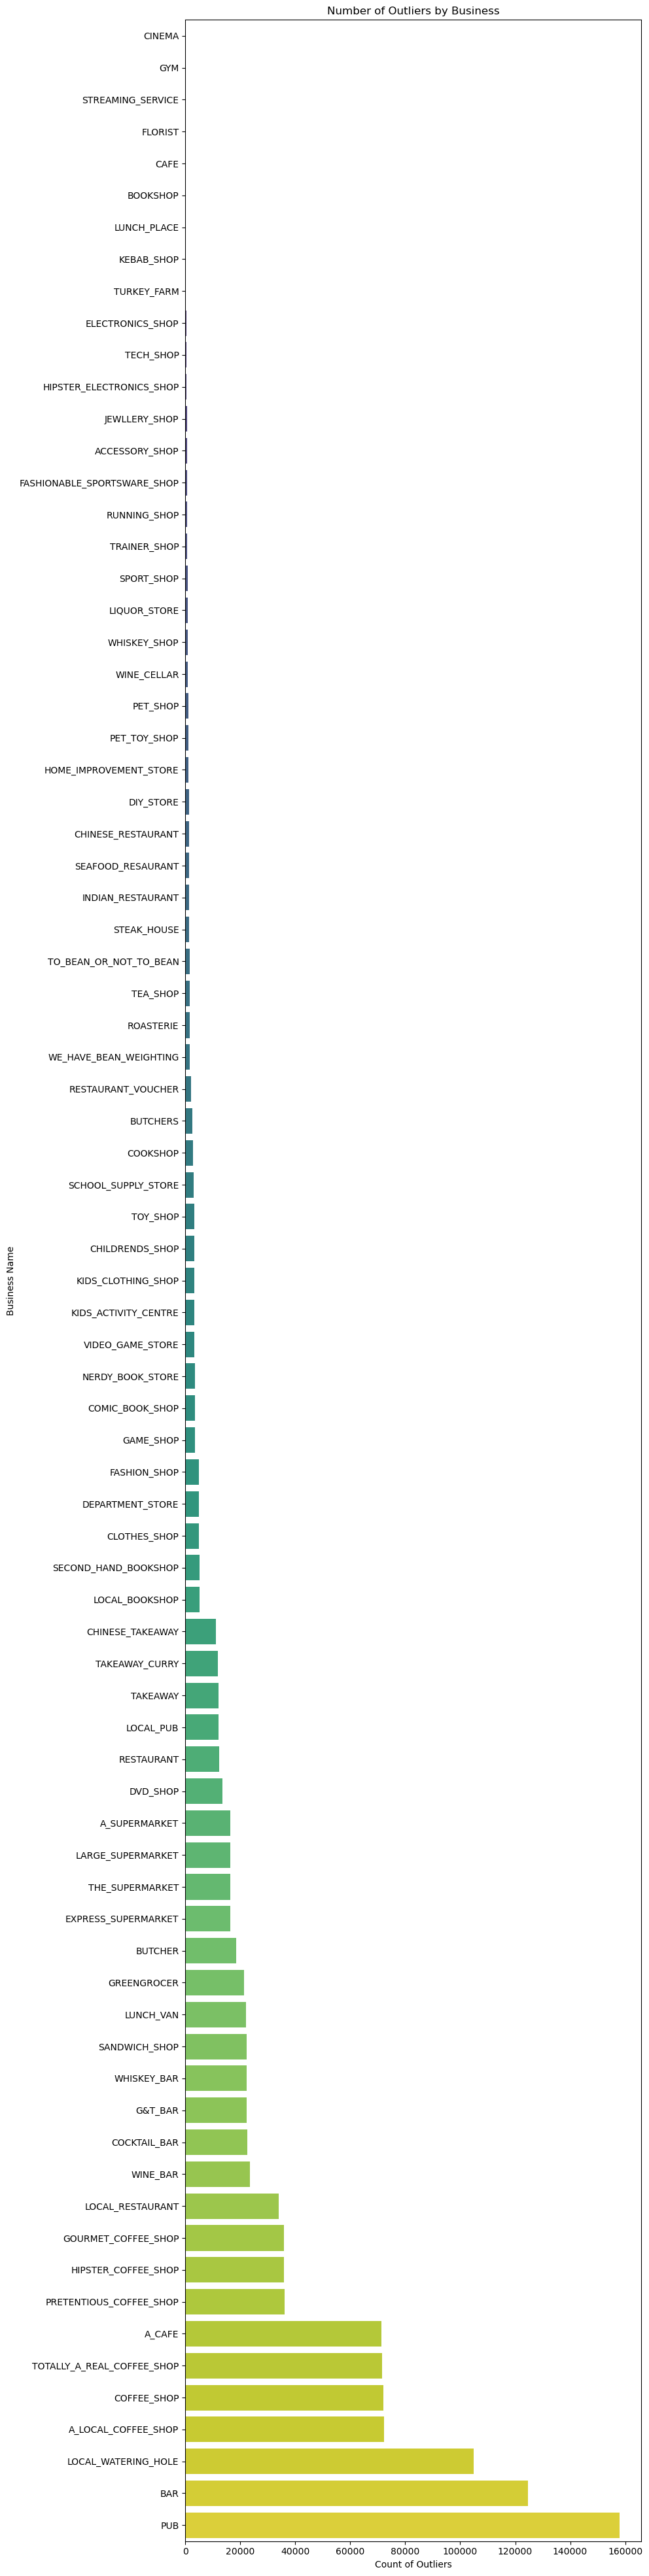

In [42]:
# Step 2: Creating a sorted horizontal bar chart
plt.figure(figsize=(10, len(outlier_counts) / 2))  # Adjust the figure size dynamically based on number of businesses
sns.barplot(x='Outlier_Count', y='Business_Name', data=outlier_counts_df_sorted, palette='viridis')

plt.title('Number of Outliers by Business')
plt.xlabel('Count of Outliers')
plt.ylabel('Business Name')

plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()